In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score

In [ ]:
import pandas as pd


data=pd.read_csv('motion_data.csv')

In [ ]:
data.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


Skewness of AccX: 0.2373612795439843
Skewness of AccY: -0.13780222221587107
Skewness of AccZ: 0.024260479524872036
Skewness of GyroX: 0.19153998188018312
Skewness of GyroY: -0.2926478290521362
Skewness of GyroZ: 0.34565200684015085


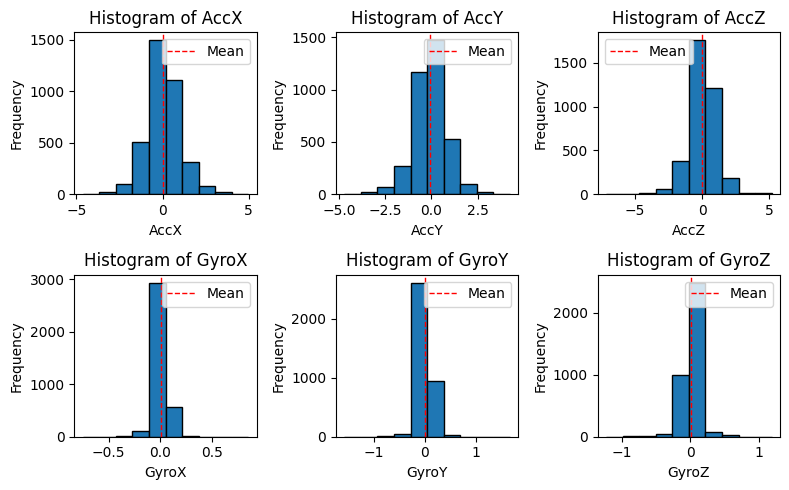

In [ ]:
features = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']

fig, axes = plt.subplots(2, 3, figsize=(8,5))

for i, feature in enumerate(features):
    feature_skewness = skew(data[feature])
    print(f'Skewness of {feature}: {feature_skewness}')

    ax = axes[i // 3, i % 3]
    ax.hist(data[feature], bins=10, edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.axvline(data[feature].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
x=data.drop(columns='Class',axis=1)

In [ ]:
x

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,3581631
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,3583791


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
y=data.iloc[:,-2]

In [ ]:
y

0       NORMAL
1       NORMAL
2       NORMAL
3       NORMAL
4       NORMAL
         ...  
3639      SLOW
3640      SLOW
3641      SLOW
3642      SLOW
3643      SLOW
Name: Class, Length: 3644, dtype: object

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(list(y_train) + list(y_test))

LabelEncoder()

In [ ]:
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10, random_state=42), n_estimators=50, random_state=42)
ada.fit(x_train, y_train_encoded)

# Predict on the test set
ada_pred = ada.predict(x_test)

ada_accuracy = accuracy_score(y_test_encoded, ada_pred)
print(f"AdaBoost with Random Forest Test Accuracy: {ada_accuracy:.2f}")

target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test_encoded, ada_pred, target_names=target_names))

AdaBoost with Random Forest Test Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       269
           2       1.00      1.00      1.00       249

    accuracy                           1.00       729
   macro avg       1.00      1.00      1.00       729
weighted avg       1.00      1.00      1.00       729



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


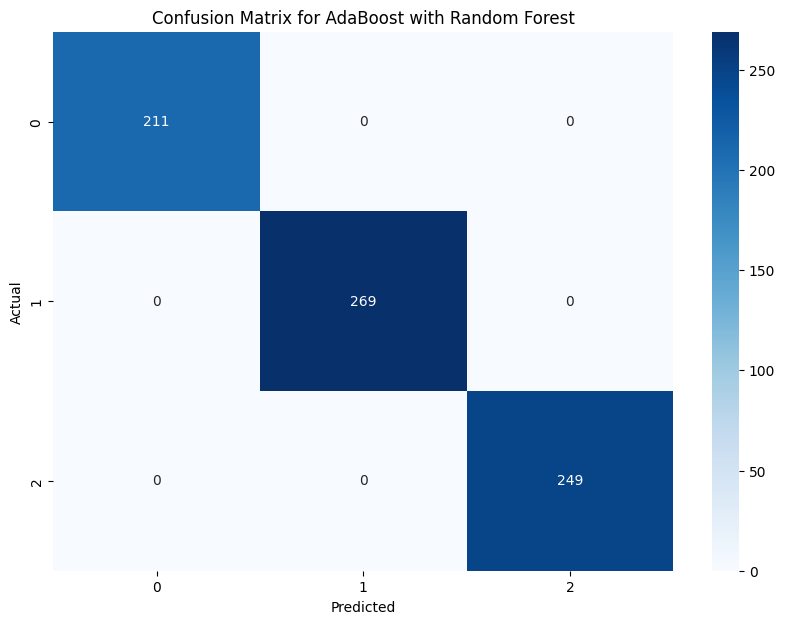

In [ ]:
conf_matrix = confusion_matrix(y_test_encoded, ada_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost with Random Forest')
plt.show()

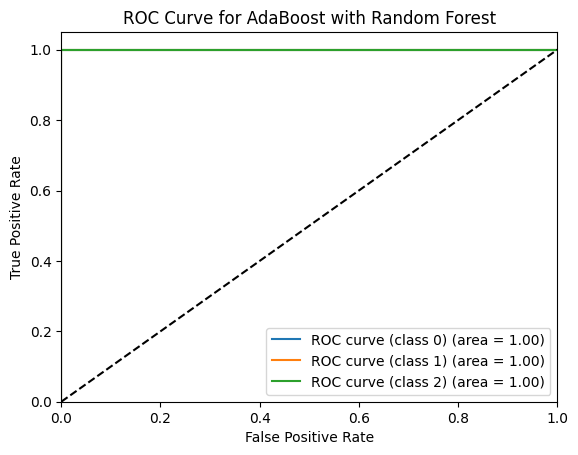

In [ ]:
y_pred_proba = ada.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_encoded == i, y_pred_proba[:, i])

plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {label_encoder.classes_[i]}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost with Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/sensors/train_motion_data.csv")
df_test = pd.read_csv("/content/drive/MyDrive/sensors/test_motion_data.csv")

In [ ]:
TIMESTEPS = 20
FEATURES = 6
LABELS = 3
N_RECORDS = 11
N_STEPS = 5
N_LENGTH = TIMESTEPS // N_STEPS

In [ ]:
df_train_normal = df_train[df_train['Class'] == 'NORMAL']
df_train_slow = df_train[df_train['Class'] == 'SLOW']
df_train_aggressive = df_train[df_train['Class'] == 'AGGRESSIVE']

df_test_normal = df_test[df_test['Class'] == 'NORMAL']
df_test_slow = df_test[df_test['Class'] == 'SLOW']
df_test_aggressive = df_test[df_test['Class'] == 'AGGRESSIVE']

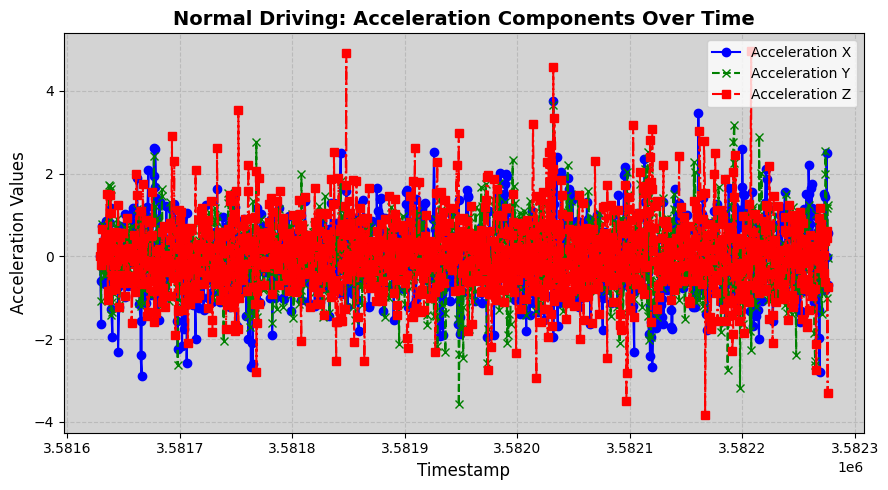

In [ ]:

plt.figure(figsize=(9, 5))

# Plotting each acceleration component with different styles
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccX'], color='blue', linestyle='-', marker='o', label='Acceleration X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccY'], color='green', linestyle='--', marker='x', label='Acceleration Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], color='red', linestyle='-.', marker='s', label='Acceleration Z')

# Enhancing plot aesthetics
plt.title('Normal Driving: Acceleration Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Acceleration Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('lightgrey')

plt.show()


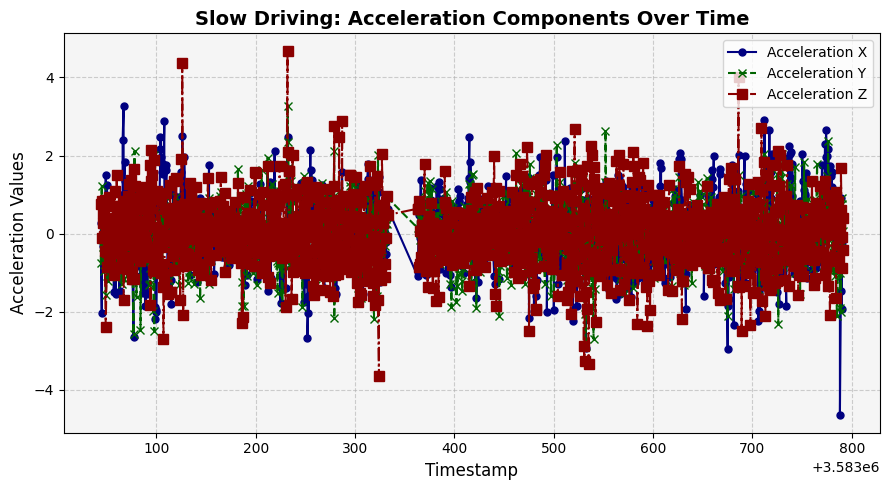

In [ ]:

plt.figure(figsize=(9,5))

# Plotting each acceleration component with different styles
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccX'], color='navy', linestyle='-', marker='o', markersize=5, label='Acceleration X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccY'], color='darkgreen', linestyle='--', marker='x', markersize=6, label='Acceleration Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], color='darkred', linestyle='-.', marker='s', markersize=7, label='Acceleration Z')

# Enhancing plot aesthetics
plt.title('Slow Driving: Acceleration Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Acceleration Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('whitesmoke')

plt.show()

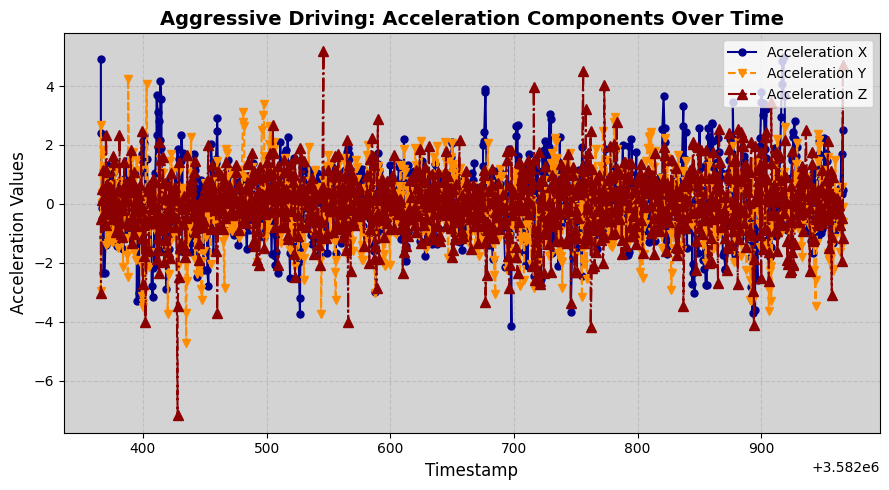

In [ ]:


plt.figure(figsize=(9, 5))

# Plotting each acceleration component with distinct styles
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], color='darkblue', linestyle='-', marker='o', markersize=5, label='Acceleration X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], color='darkorange', linestyle='--', marker='v', markersize=6, label='Acceleration Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], color='darkred', linestyle='-.', marker='^', markersize=7, label='Acceleration Z')

# Enhancing plot aesthetics
plt.title('Aggressive Driving: Acceleration Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Acceleration Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('lightgrey')

plt.show()



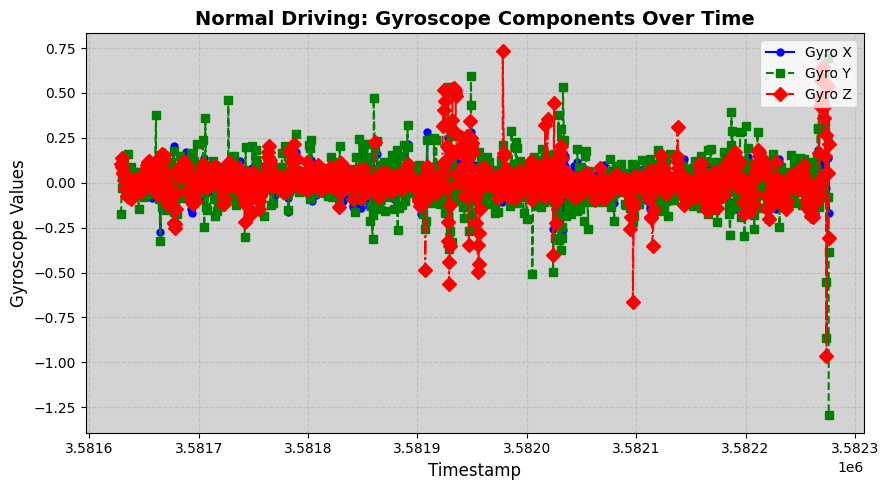

In [ ]:


plt.figure(figsize=(9,5))

# Plotting each gyroscope component with distinct styles
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], color='blue', linestyle='-', marker='o', markersize=5, label='Gyro X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], color='green', linestyle='--', marker='s', markersize=6, label='Gyro Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], color='red', linestyle='-.', marker='D', markersize=7, label='Gyro Z')

# Enhancing plot aesthetics
plt.title('Normal Driving: Gyroscope Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Gyroscope Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('lightgrey')

plt.show()


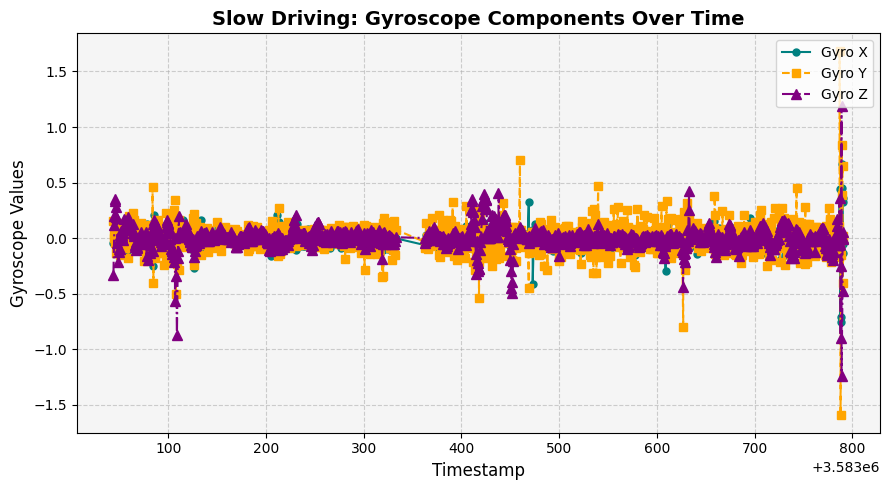

In [ ]:


plt.figure(figsize=(9,5))

# Plotting each gyroscope component with distinct styles
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], color='teal', linestyle='-', marker='o', markersize=5, label='Gyro X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], color='orange', linestyle='--', marker='s', markersize=6, label='Gyro Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], color='purple', linestyle='-.', marker='^', markersize=7, label='Gyro Z')

# Enhancing plot aesthetics
plt.title('Slow Driving: Gyroscope Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Gyroscope Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('whitesmoke')

plt.show()


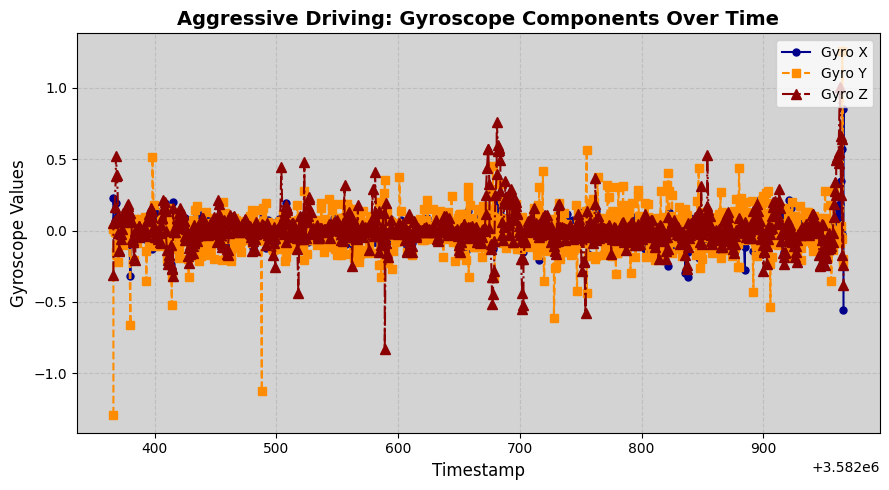

In [ ]:


plt.figure(figsize=(9,5))

# Plotting each gyroscope component with distinct styles
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], color='darkblue', linestyle='-', marker='o', markersize=5, label='Gyro X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], color='darkorange', linestyle='--', marker='s', markersize=6, label='Gyro Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], color='darkred', linestyle='-.', marker='^', markersize=7, label='Gyro Z')

# Enhancing plot aesthetics
plt.title('Aggressive Driving: Gyroscope Components Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Gyroscope Values', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a background color for better contrast
plt.gca().set_facecolor('lightgrey')

plt.show()


In [ ]:
df_train_slow = df_train_slow.iloc[N_RECORDS:-N_RECORDS]

df_test_slow = df_test_slow.iloc[N_RECORDS:-N_RECORDS]

df_train_normal = df_train_normal.iloc[N_RECORDS:-N_RECORDS]

df_test_normal = df_test_normal.iloc[N_RECORDS:-N_RECORDS]

df_train_aggressive = df_train_aggressive.iloc[N_RECORDS:-N_RECORDS]

df_test_aggressive = df_test_aggressive.iloc[N_RECORDS:-N_RECORDS]


In [ ]:
train_slow_samples = df_train_slow.__len__()
train_normal_samples = df_train_normal.__len__()
train_aggressive_samples = df_train_aggressive.__len__()

print('---Train---')
print('Slow samples: ' + str(train_slow_samples))
print('Normal samples: ' + str(train_normal_samples))
print('Aggressive samples: ' + str(train_aggressive_samples))

df_train_slow = df_train_slow.tail(1300)
df_train_normal = df_train_normal.tail(1160)
df_train_aggressive = df_train_aggressive.tail(1080)

---Train---
Slow samples: 1309
Normal samples: 1178
Aggressive samples: 1091


In [ ]:
test_slow_samples = df_test_slow.__len__()
test_normal_samples = df_test_normal.__len__()
test_aggressive_samples = df_test_aggressive.__len__()

print('---Test---')
print('Slow samples: ' + str(test_slow_samples))
print('Normal samples: ' + str(test_normal_samples))
print('Aggressive samples: ' + str(test_aggressive_samples))

df_test_slow = df_test_slow.tail(1240)
df_test_normal = df_test_normal.tail(960)
df_test_aggressive = df_test_aggressive.tail(780)


---Test---
Slow samples: 1251
Normal samples: 975
Aggressive samples: 792


In [ ]:
X_train_normal = df_train_normal.iloc[: , :FEATURES]
X_train_slow = df_train_slow.iloc[: , :FEATURES]
X_train_aggressive = df_train_aggressive.iloc[: , :FEATURES]

X_test_normal = df_test_normal.iloc[: , :FEATURES]
X_test_slow = df_test_slow.iloc[: , :FEATURES]
X_test_aggressive = df_test_aggressive.iloc[: , :FEATURES]

# Labels
y_train_normal = df_train_normal.Class
y_train_slow = df_train_slow.Class
y_train_aggressive = df_train_aggressive.Class

y_test_normal = df_test_normal.Class
y_test_slow = df_test_slow.Class
y_test_aggressive = df_test_aggressive.Class

In [ ]:
X_train = pd.concat([X_train_slow, X_train_normal, X_train_aggressive])
y_train = pd.concat([y_train_slow, y_train_normal, y_train_aggressive])

X_test = pd.concat([X_test_slow, X_test_normal, X_test_aggressive])
y_test = pd.concat([y_test_slow, y_test_normal, y_test_aggressive])

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=LABELS)
y_test = to_categorical(y_test, num_classes=LABELS)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_samples = X_train.shape[0]//TIMESTEPS
test_samples = X_test.shape[0]//TIMESTEPS

X_train = X_train.reshape(train_samples, N_STEPS, N_LENGTH, FEATURES)
X_test = X_test.reshape(test_samples, N_STEPS, N_LENGTH, FEATURES)

print('Train features shape: ' + str(X_train.shape[0]))
print('Test features shape: ' + str(X_test.shape[0]))

Train features shape: 177
Test features shape: 149


In [ ]:
y_train = y_train[::TIMESTEPS]
y_test = y_test[::TIMESTEPS]

print('Train labels shape: ' + str(y_train.shape[0]))
print('Test labels shape: ' + str(y_test.shape[0]))

Train labels shape: 177
Test labels shape: 149


In [ ]:
import tensorflow as tf
from tensorflow import keras, lite
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()

    model.add(TimeDistributed(
        Conv1D(
            filters=hp.Int('filter_1_units', min_value=16, max_value=64, step=16),
            kernel_size=3,
            padding='same',
            activation='relu'
        ),
        input_shape=(None, N_LENGTH, FEATURES)
    ))

    model.add(TimeDistributed(
        Conv1D(
            filters=hp.Int('filter_2_units', min_value=16, max_value=64, step=16),
            kernel_size=3,
            padding='same',
            activation='relu'
        )
    ))

    model.add(TimeDistributed(Dropout(hp.Float('dropout_conv_rate', min_value=0, max_value=0.5, step=0.1))))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))

    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(
            hp.Int(f'lstm_{i}_units', min_value=32, max_value=512, step=32),
            dropout=hp.Float(f'dropout_{i}_rate', min_value=0, max_value=0.5, step=0.1),
            return_sequences=True
        ))

    model.add(LSTM(hp.Int('lstm_output_neurons', min_value=32, max_value=512, step=32), return_sequences=False))

    model.add(Dropout(hp.Float('output_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.add(Dense(hp.Int('dense_neurons', min_value=32, max_value=512, step=32)))
    model.add(Dense(LABELS, activation='softmax'))


    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.6 MB/s eta 0:00:00


In [ ]:

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='cnn_lstm_dir',
                     project_name='driving_behavior')



In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[stop_early],
    shuffle=True
)

Trial 90 Complete [00h 00m 19s]
val_accuracy: 0.536912739276886

Best val_accuracy So Far: 0.5906040072441101
Total elapsed time: 00h 21m 00s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
eval_result = best_model.evaluate(X_test, y_test)

5/5 [==============================] - 2s 8ms/step - loss: 0.9970 - accuracy: 0.5906 - precision: 0.6235 - recall: 0.3557


In [ ]:
y_pred = best_model.predict(X_test)
df_predicted = pd.DataFrame(y_pred, columns=['AGGRESSIVE', 'NORMAL', 'SLOW'])

5/5 [==============================] - 1s 6ms/step


In [ ]:
df_predicted.head()

,AGGRESSIVE,NORMAL,SLOW
0,0.034181,0.427712,0.538107
1,0.037830,0.405602,0.556568
2,0.065082,0.393314,0.541604
3,0.050061,0.423507,0.526433
4,0.029374,0.468470,0.502156


In [ ]:

# Reverse the one hot encoded vector
actual_y_test = np.argmax(y_test, axis=1)
array_actual = labelEncoder.inverse_transform(actual_y_test)

# Transform the given class array to a Dataframe
df_actual = pd.DataFrame(array_actual, columns = ['Original Class'])
df_actual

,Original Class
0,SLOW
1,SLOW
2,SLOW
3,SLOW
4,SLOW
...,...
144,AGGRESSIVE
145,AGGRESSIVE
146,AGGRESSIVE
147,AGGRESSIVE


In [ ]:
# Combine the actual and resulted classes
df_result = pd.concat([df_predicted, df_actual], axis=1)
df_result

,AGGRESSIVE,NORMAL,SLOW,Original Class
0,0.034181,0.427712,0.538107,SLOW
1,0.037830,0.405602,0.556568,SLOW
2,0.065082,0.393314,0.541604,SLOW
3,0.050061,0.423507,0.526433,SLOW
4,0.029374,0.468470,0.502156,SLOW
...,...,...,...,...
144,0.027689,0.423934,0.548377,AGGRESSIVE
145,0.989641,0.008253,0.002106,AGGRESSIVE
146,0.212953,0.341284,0.445763,AGGRESSIVE
147,0.020248,0.410446,0.569306,AGGRESSIVE


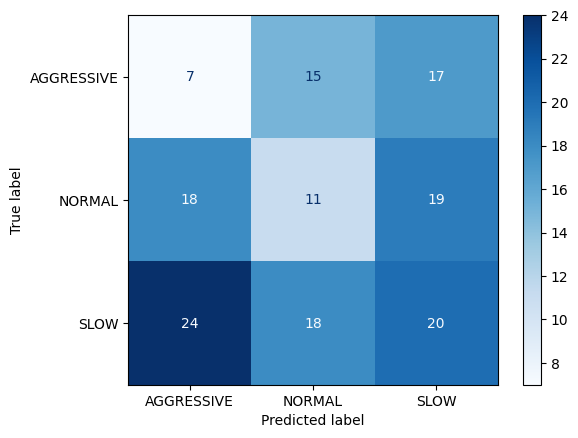

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['AGGRESSIVE', 'NORMAL', 'SLOW']

# Ensure y_pred is a 2D array of probabilities or logits
# Example initialization for demonstration:
y_pred = np.random.rand(len(actual_y_test), len(classes))  # Replace with actual y_pred

# Convert y_pred from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(actual_y_test, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')  # Adjust plot settings as needed


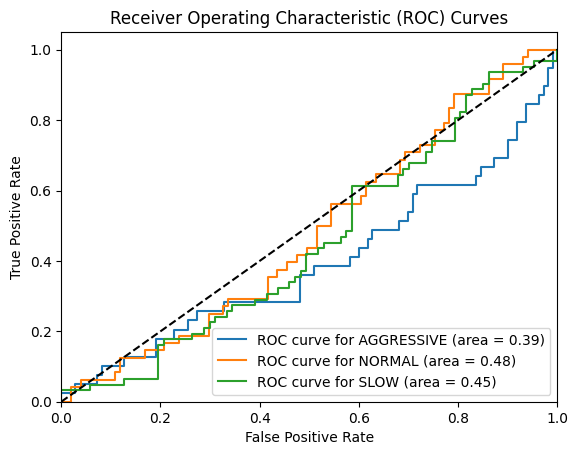

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

actual_y_test_binarized = label_binarize(actual_y_test, classes=range(len(classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(actual_y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {classes[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
